## Google Data Analytics Capstone Project: How does a bike-share navigate speedy success?

### About the Company

Cyclistic is a successful bike-share company in Chicago with a fleet of 5,824 bicycles and 692 stations. Their pricing plans include single-ride passes, full-day passes, and annual memberships, targeting casual riders and members. The company's finance analysts found that annual members are more profitable than casual riders. Cyclistic aims to design marketing strategies to convert casual riders into annual members, focusing on understanding their differences, motivations, and the impact of digital media on marketing efforts.

The following data analysis steps will be followed as stated by Google:

Ask, Prepare, Process, Analyse, Share.

### ASK

The following 3 questions needs to be answered:

1.	How do annual members and casual riders use Cyclistic bikes differently?
2.	Why would casual riders buy Cyclistic annual memberships?
3.	How can Cyclistic use digital media to influence casual riders to become members?

#### Business task

The business task is to analyse Cyclistic's historical bike trip data to understand the differences in usage patterns between casual riders and annual members and use these insights to design targeted marketing strategies aimed at converting casual riders into annual members, ultimately maximizing the company's profitability and growth.

### Prepare

The dataset follows the ROCCC Analysis as described below:
* Reliable - yes, not biased.
* Original - yes, can locate the original public data.
* Comprehensive - yes, not missing important information.
* Current - yes, updated monthly.
* Cited - yes.

I will be using the public dataset located at https://divvy-tripdata.s3.amazonaws.com/index.html. The data has been made available by Motivate International Inc. under this license https://www.divvybikes.com/data-license-agreement. 

Key Tasks Followed:
* Downloaded data and copies have been stored on the computer in a folder called “Data”.
* I have downloaded the data for January 22 - February 23 Period.
* The data is in CSV (comma-separated values) format, and there are a total of 13 columns.

#### Importing Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob 
import calendar

#### Importing Data to Python

In [3]:
csv_files = glob.glob('G:\My Drive\Data Analyst\Projects\Google Course Capstone Projects\How Does a Bike-Share Navigate Speedy Success\Data\*.csv')

#### Merging data into a dataframe

In [4]:
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

### Process

#### Cleaning and Preparing Data

In [ ]:
num_rows = combined_df.shape[0] #Number of Rows
num_columns = combined_df.shape[1] #Number of Columns
combined_df.head() #see the first rows of the data frame
combined_df.tail() #see the last 6 rows of the data frame
combined_df.info() #Provides a summary of the DataFrame, including index dtype and column dtypes, non-null values, and memory usage.
combined_df.shape #Returns a tuple with the number of rows and columns in the DataFrame.
combined_df.columns #Lists the column names.
combined_df.dtypes #Shows the data types of each column.
combined_df.describe() #Generates descriptive statistics of the DataFrame for numerical columns.

#Data consists of Disitnct Ride id, 3 different types of bikes, station names/ID/Longititude/latitude, member/casual rider and Ride starting/ending time.

#### Cheacking and Removing NA's

In [5]:
combined_df.isnull().sum()
combined_df.dropna(inplace=True)

#### Making data consistent (Date)

In [6]:
combined_df['started_at'] = pd.to_datetime(combined_df['started_at'], errors='coerce')
combined_df['ended_at'] = pd.to_datetime(combined_df['ended_at'], errors='coerce')
combined_df['started_at'] = combined_df['started_at'].dt.strftime('%Y-%m-%d %H:%M:%S')
combined_df['ended_at'] = combined_df['ended_at'].dt.strftime('%Y-%m-%d %H:%M:%S')

#### Adding a column for Ride length

In [7]:
combined_df['started_at'] = pd.to_datetime(combined_df['started_at'], errors='coerce')
combined_df['ended_at'] = pd.to_datetime(combined_df['ended_at'], errors='coerce')
combined_df['Ride_length'] = combined_df['ended_at'] - combined_df['started_at']

#### Checking consistency of Ride length & Ride ID

In [8]:
combined_df = combined_df[combined_df['Ride_length'].dt.total_seconds() > 0].drop_duplicates(subset=['ride_id'])

#### Adding columns for the day of the week into the data frame

In [9]:
combined_df['started_at'] = pd.to_datetime(combined_df['started_at'])
combined_df['day_of_week'] = combined_df['started_at'].dt.day_name()

#### Export as csv for analysis in external programs

In [10]:
combined_df.to_csv('G:\My Drive\Data Analyst\Projects\Google Course Capstone Projects\How Does a Bike-Share Navigate Speedy Success\Python\combined_df.csv', index=False)

### Analyse

Key Tasks:
1. Aggregate your data so it’s useful and accessible.
2. Organize and format your data.
3. Perform calculations.
4. Identify trends and relationships.

#### Ride Analysis

In [11]:
combined_df['Ride_length'] = pd.to_timedelta(combined_df['Ride_length'])
print("The average ride length is", round(combined_df['Ride_length'].mean() / np.timedelta64(1, 'm'), 2), "minutes.")

combined_df['Ride_length'] = pd.to_timedelta(combined_df['Ride_length'])
print("The max ride length is", round(combined_df['Ride_length'].max() / np.timedelta64(1, 'D'), 2), "days.")

The average ride length is 16.74 minutes.
The max ride length is 23.86 days.


#### Comparing members and casual users

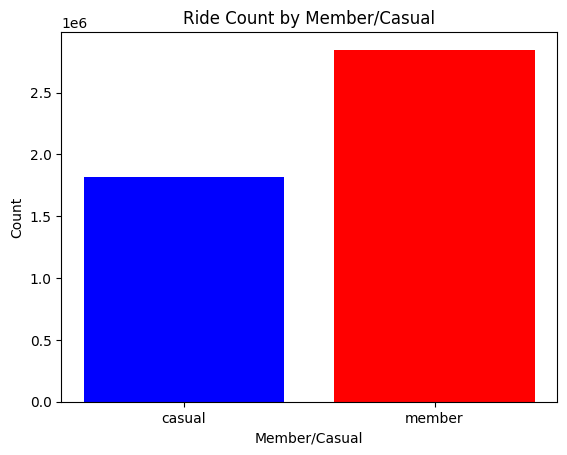

In [12]:
grouped_data = combined_df.groupby('member_casual')['ride_id'].count()
plt.bar(grouped_data.index, grouped_data.values, color=['blue', 'red'])
plt.xlabel('Member/Casual')
plt.ylabel('Count')
plt.title('Ride Count by Member/Casual')
plt.show()

#### Ride behavior of members and casual riders

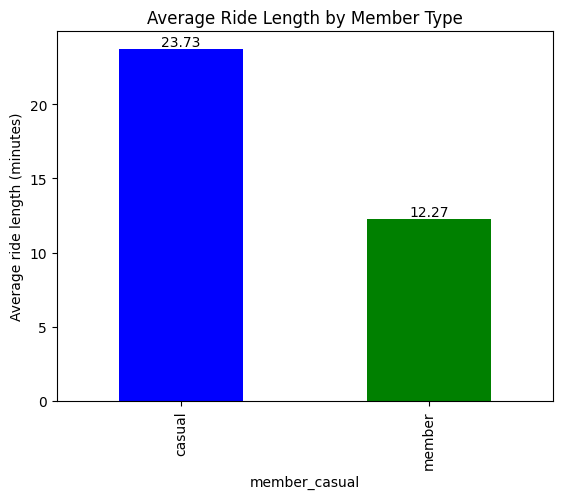

In [32]:
# Convert Ride_length to datetime format
combined_df['Ride_length'] = pd.to_timedelta(combined_df['Ride_length'])

# Calculate average ride length for each group
df = combined_df.groupby('member_casual')['Ride_length'].mean()

# Plot bar chart
ax = df.dt.total_seconds().div(60).plot(kind='bar', color=['blue', 'green'])
ax.set_title('Average Ride Length by Member Type')
ax.set_ylabel('Average ride length (minutes)')

# Add data labels to bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, labels=[f'{x:.2f}' for x in i.datavalues])

plt.show()

#### Comparing Bikes

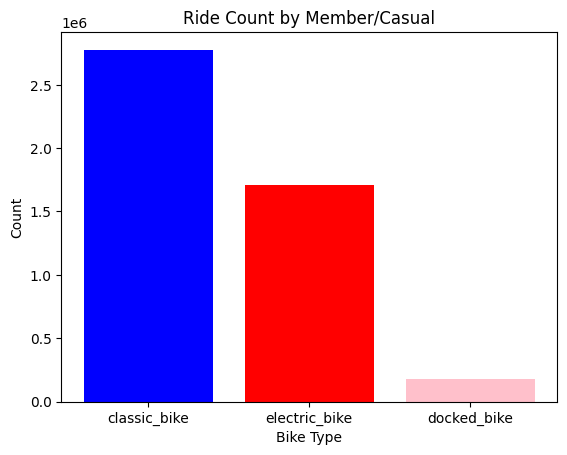

In [41]:
grouped_data = combined_df.groupby('rideable_type')['ride_id'].count()
grouped_data = grouped_data.sort_values(ascending=False)
plt.bar(grouped_data.index, grouped_data.values, color=['blue', 'red', 'pink'])
plt.xlabel('Bike Type')
plt.ylabel('Count')
plt.title('Ride Count by Member/Casual')
plt.show()

* Classic bikes are by far the most attractive option
* Nearly nobody uses docked bikes

#### Choice of Bikes by Riders

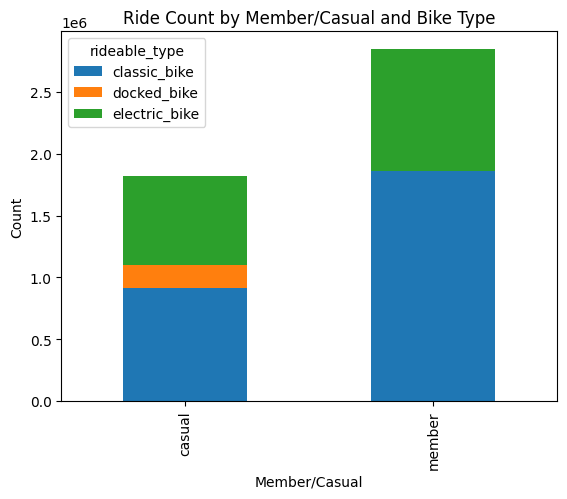

In [49]:
grouped_data = combined_df.groupby(['member_casual', 'rideable_type'])['ride_id'].count()
grouped_data.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Member/Casual')
plt.ylabel('Count')
plt.title('Ride Count by Member/Casual and Bike Type')
plt.show()

* Members use classic bikes the most
* Electric bikes are prefered the same amount by both casuals and members
* Members don't use docked bikes at all

#### Weekday Rides (usage on different days)

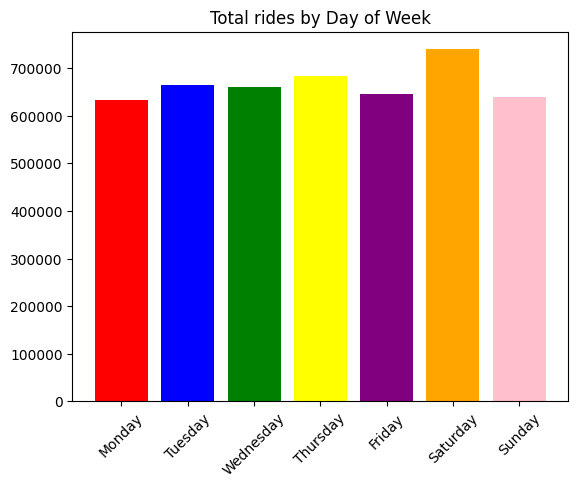

In [56]:
counts = combined_df.groupby('day_of_week').size().reset_index(name='ride_id')
counts['day_of_week'] = pd.Categorical(counts['day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
counts = counts.sort_values('day_of_week')
plt.bar(counts['day_of_week'], counts['ride_id'], color=['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink'])
plt.title('Total rides by Day of Week')
plt.xticks(rotation=45)
plt.show()

#### Daily rides of members and casual riders

C:\Users\Alex\AppData\Local\Temp\ipykernel_12976\1475038440.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts['day_of_week'].unique(), rotation=45)


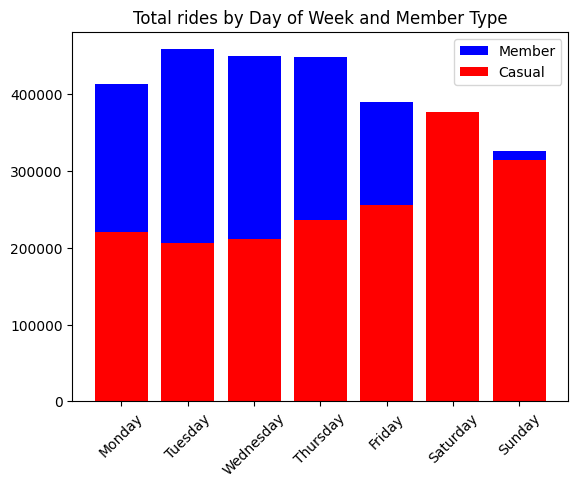

In [57]:
# group by day_of_week and member_casual columns and count the number of rides
counts = combined_df.groupby(['day_of_week', 'member_casual']).size().reset_index(name='ride_id')

# sort by day_of_week column
counts['day_of_week'] = pd.Categorical(counts['day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
counts = counts.sort_values('day_of_week')

# plot bar chart
fig, ax = plt.subplots()
ax.bar(counts[counts['member_casual'] == 'member']['day_of_week'], counts[counts['member_casual'] == 'member']['ride_id'], color='blue', label='Member')
ax.bar(counts[counts['member_casual'] == 'casual']['day_of_week'], counts[counts['member_casual'] == 'casual']['ride_id'], color='red', label='Casual')
ax.set_title('Total rides by Day of Week and Member Type')
ax.set_xticklabels(counts['day_of_week'].unique(), rotation=45)
ax.legend()
plt.show()

* Casual Riders preferred to ride on weekends, especially Saturdays.
* We can infer that members are mostly working people since the only times members greatly out perfrom casuals are on weekdays.

#### Rides by member type over time

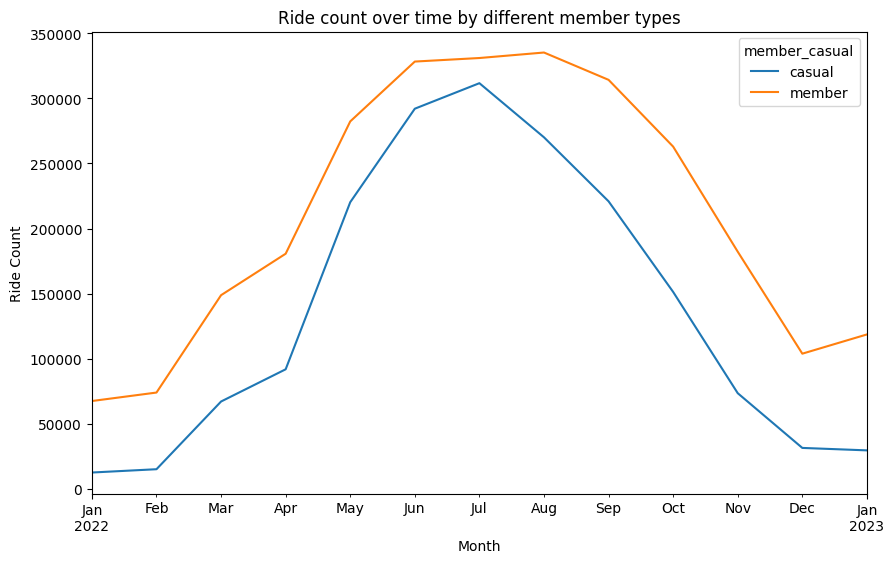

In [132]:
grouped = combined_df.groupby([pd.Grouper(key='started_at', freq='M'), 'member_casual'])['ride_id'].count().reset_index()

pivoted = grouped.pivot(index='started_at', columns='member_casual', values='ride_id')

ax = pivoted.plot(kind='line', figsize=(10, 6), title='Ride count over time by different member types')
ax.set_xlabel('Month')
ax.set_ylabel('Ride Count')
ax.set_xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2023-01-01'))
plt.show()

* Both member types prefer to ride bikes in the Summer.
* Both member's total bike rides peak around July

#### Starting Stations Used By Riders

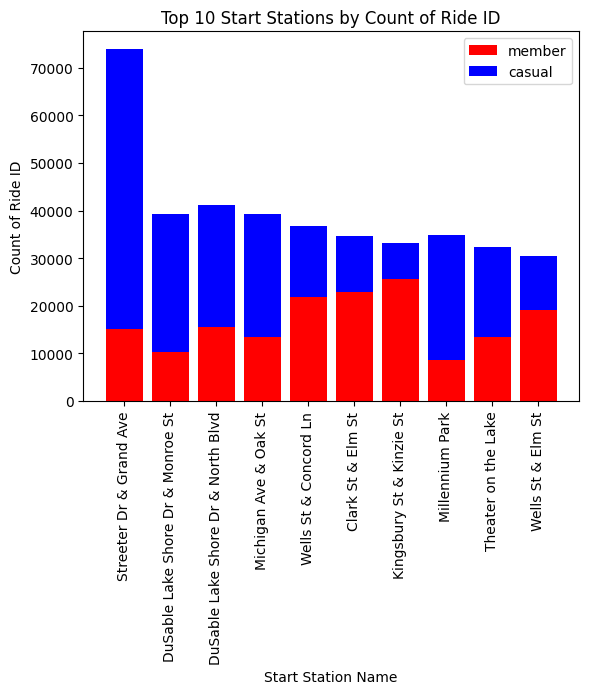

In [10]:
top_10_stations = combined_df['start_station_name'].value_counts().nlargest(10)

colors = {'member': 'red', 'casual': 'blue'}

member_count = []
casual_count = []

for station in top_10_stations.index:
    member_count.append(combined_df[(combined_df['end_station_name'] == station) & (combined_df['member_casual'] == 'member')].shape[0])
    casual_count.append(combined_df[(combined_df['end_station_name'] == station) & (combined_df['member_casual'] == 'casual')].shape[0])

plt.bar(top_10_stations.index, member_count, color=colors['member'])
plt.bar(top_10_stations.index, casual_count, bottom=member_count, color=colors['casual'])

plt.xlabel('Start Station Name')
plt.ylabel('Count of Ride ID')
plt.title('Top 10 Start Stations by Count of Ride ID')
plt.legend(['member', 'casual'])

plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees

plt.show()

#### Ending Stations used by Riders

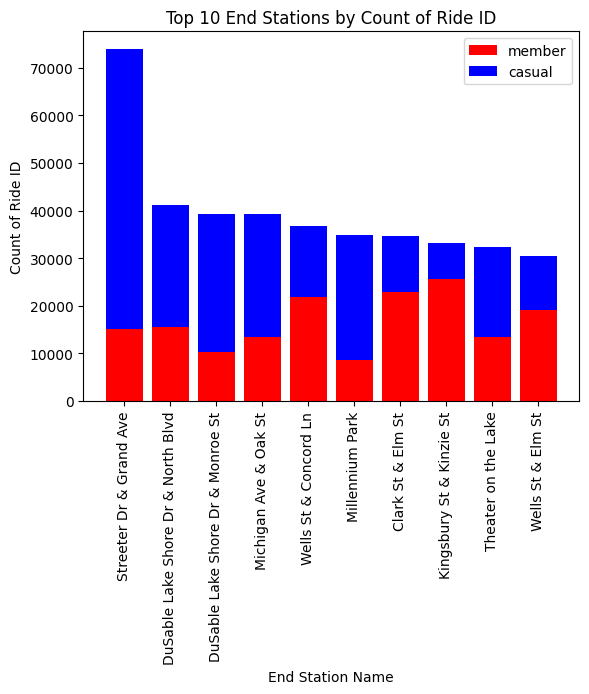

In [151]:
top_10_stations = combined_df['end_station_name'].value_counts().nlargest(10)

colors = {'member': 'red', 'casual': 'blue'}

member_count = []
casual_count = []

for station in top_10_stations.index:
    member_count.append(combined_df[(combined_df['end_station_name'] == station) & (combined_df['member_casual'] == 'member')].shape[0])
    casual_count.append(combined_df[(combined_df['end_station_name'] == station) & (combined_df['member_casual'] == 'casual')].shape[0])

plt.bar(top_10_stations.index, member_count, color=colors['member'])
plt.bar(top_10_stations.index, casual_count, bottom=member_count, color=colors['casual'])

plt.xlabel('End Station Name')
plt.ylabel('Count of Ride ID')
plt.title('Top 10 End Stations by Count of Ride ID')
plt.legend(['member', 'casual'])

plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees

plt.show()

### Share

To convert casual riders into annual members, consider implementing the following marketing strategies:
* Offer occasional membership discounts to casual riders during summer and weekends.
* Increase the renting price of bikes for weekends to encourage casual users to become members, especially for classic and electric bikes which are preferred more by casual users.
* Put up banners or special discount advertisements at Lake Shore Drive that would target casual users and influence them to become members."